<a href="https://colab.research.google.com/github/ggutierrezf/ALURA-CHALLENGE-02/blob/main/telecomx_latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
import pandas as pd

In [ ]:
# Carga de  datos de la BD JSON

df = pd.read_json('/content/TelecomX_Data.json')
display(df.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [ ]:
# Aplanando las Columnas ("customer", "phone", "internet", "account")

customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

display(customer_df.head(2))
display(phone_df.head(2))
display(internet_df.head(2))
display(account_df.head(2))

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9


,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes


,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4


In [ ]:
# Incorporar las columnas aplanadas en el data frame

df = pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)
display(df.head(2))

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [ ]:
# Eliminando las columnas que fueron aplanadas.

df = df.drop(['customer', 'phone', 'internet', 'account'], axis=1)
display(df.head(2))

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [ ]:
# Analisar los datos de los registros
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

for col in df.columns:
    print(f"Nombre Columna: {col}")
    print(f"Tipo de Dato: {df[col].dtype}")
    print(f"Valores Nulos: {df[col].isnull().sum()}")
    print(f"Total de Registros: {df[col].size}")
    if df[col].dtype in ['int64', 'float64']:
        print(f"Valor Minimo: {df[col].min()}")
        print(f"Valor Maximo: {df[col].max()}")
    else:
        print("Detalle de los registros:")
        print(df[col].value_counts())
    print("-" * 20)

Nombre Columna: customerID
Tipo de Dato: object
Valores Nulos: 0
Total de Registros: 7267
Detalle de los registros:
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64
--------------------
Nombre Columna: Churn
Tipo de Dato: object
Valores Nulos: 0
Total de Registros: 7267
Detalle de los registros:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
--------------------
Nombre Columna: gender
Tipo de Dato: object
Valores Nulos: 0
Total de Registros: 7267
Detalle de los registros:
gender
Male      3675
Female    3592
Name: count, dtype: int64
--------------------
Nombre Columna: SeniorCitizen
Tipo de Dato: int64
Valores Nulos: 0
Total de Registros: 7267
Valor Minimo: 0
Valor Maximo: 1
--------------------
Nombre Columna: Partner
Tipo de Dato: object
Valores Nulos: 0
Total de Registros: 7267
Detalle 

In [ ]:
# # En el campo "Churn" hay 224 registros vacios que vamos a eliminar.
df = df[df['Churn'] != '']
print(f"Total de registros después de eliminar vacios en Churn: {len(df)}")

Total de registros después de eliminar vacios en Churn: 7043


In [ ]:
# Verificar si hay registros duplicados
registros_duplicados = df.duplicated().sum()

print(f"Numero de registros duplicados: {registros_duplicados}")

Numero de registros duplicados: 0


In [ ]:
# Eliminar el campo "customerID" por ser irrelevante para el analisis
df = df.drop('customerID', axis=1)
display(df.head(2))

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [ ]:
# dejando todos los registros en letras minusculas
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.lower()

display(df.head(2))

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,no,female,0,yes,yes,9,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.3
1,no,male,0,no,no,9,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.4


In [ ]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30
display(df.head(2))

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,no,female,0,yes,yes,9,yes,no,dsl,no,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.3,2.186667
1,no,male,0,no,no,9,yes,yes,dsl,no,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.4,1.996667


#📊 Carga y análisis

In [ ]:
# Calculamos los indicadores estadisticos basicos para todos los campos, para campos numericos y campos string
display(df.describe().round(1))
display(df.describe(include='object'))

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.0,7043.0,7043.0,7032.0,7043.0
mean,0.2,32.4,64.8,2283.3,2.2
std,0.4,24.6,30.1,2266.8,1.0
min,0.0,0.0,18.2,18.8,0.6
25%,0.0,9.0,35.5,401.4,1.2
50%,0.0,29.0,70.4,1397.5,2.3
75%,0.0,55.0,89.8,3794.7,3.0
max,1.0,72.0,118.8,8684.8,4.0


,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,no,male,no,no,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check
freq,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


Distribucion del abanono (Churn):
Churn
no     5174
yes    1869
Name: count, dtype: int64


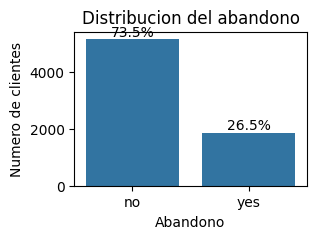

In [ ]:
# Analisis del abandono (Churn)
import matplotlib.pyplot as plt
import seaborn as sns

# Analisi de la distribucion del abandono
churn_distribution = df['Churn'].value_counts()

print("Distribucion del abanono (Churn):")
print(churn_distribution)

# Grafico
plt.figure(figsize=(3, 2))
ax = sns.countplot(data=df, x='Churn')
plt.title('Distribucion del abandono')
plt.xlabel('Abandono')
plt.ylabel('Numero de clientes')

# Churn como porcentaje
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

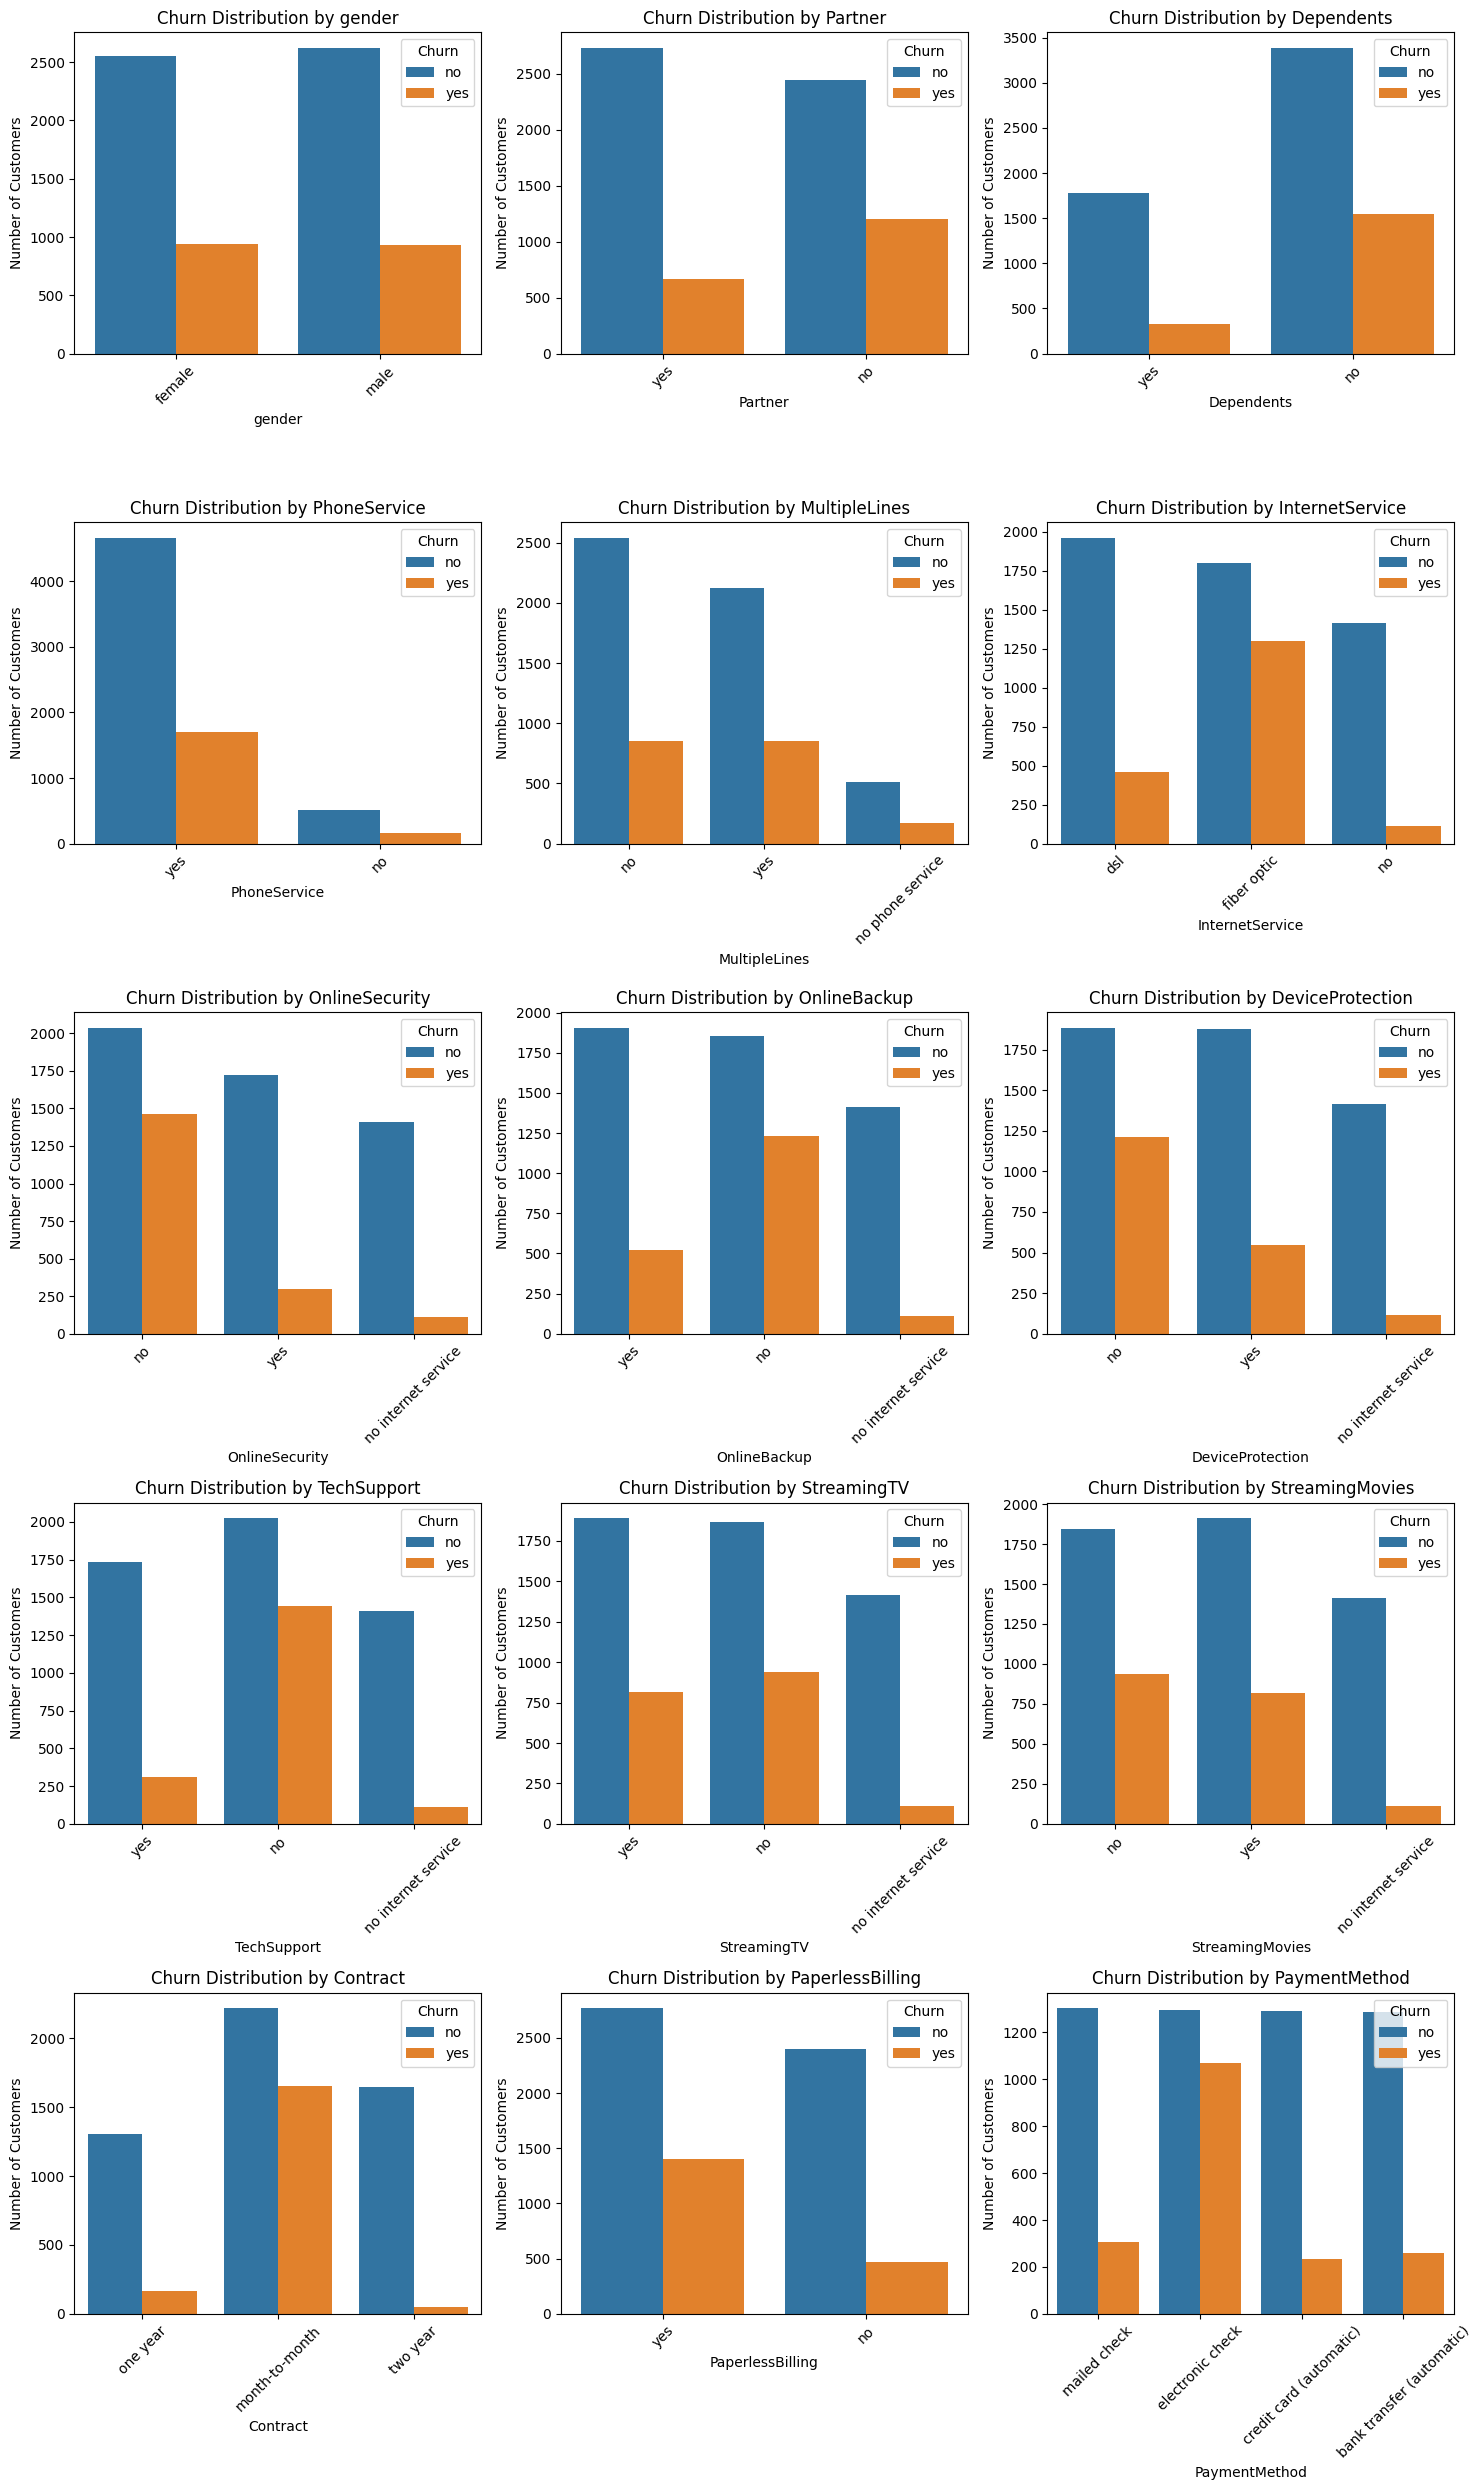

In [ ]:
#graficando
import math

categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Churn Distribution by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Number of Customers')
    axes[i].tick_params(axis='x', rotation=45)

# Escondiendo los subplot que no sean utiles
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

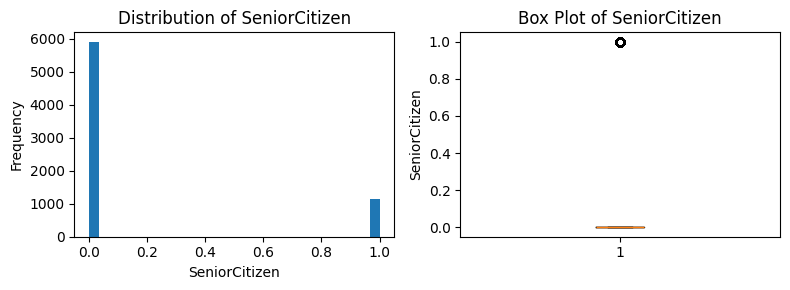

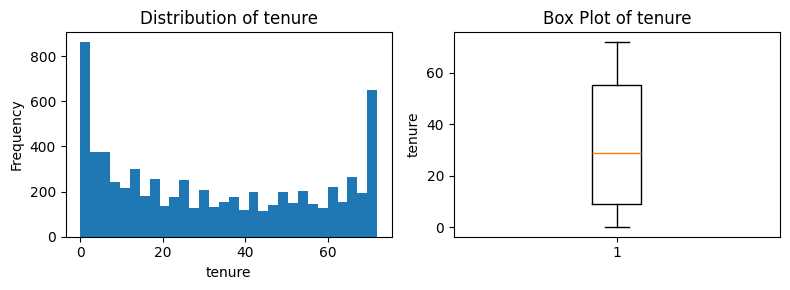

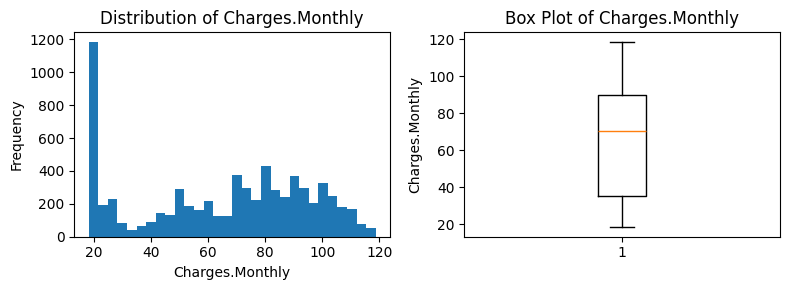

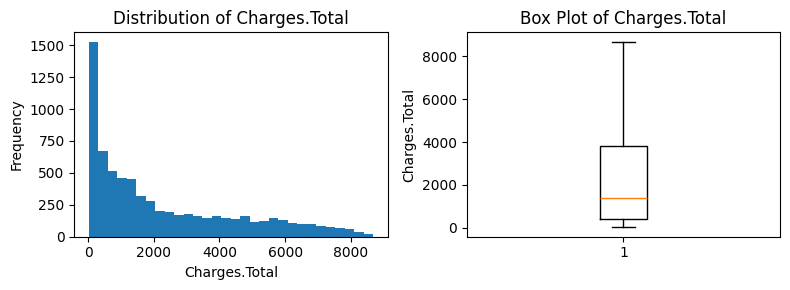

In [ ]:
numerical_cols = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total']

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))

    # Histogramas
    axes[0].hist(df[col].dropna(), bins=30)
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f'Distribution of {col}')

    # Box plot
    axes[1].boxplot(df[col].dropna())
    axes[1].set_ylabel(col)
    axes[1].set_title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

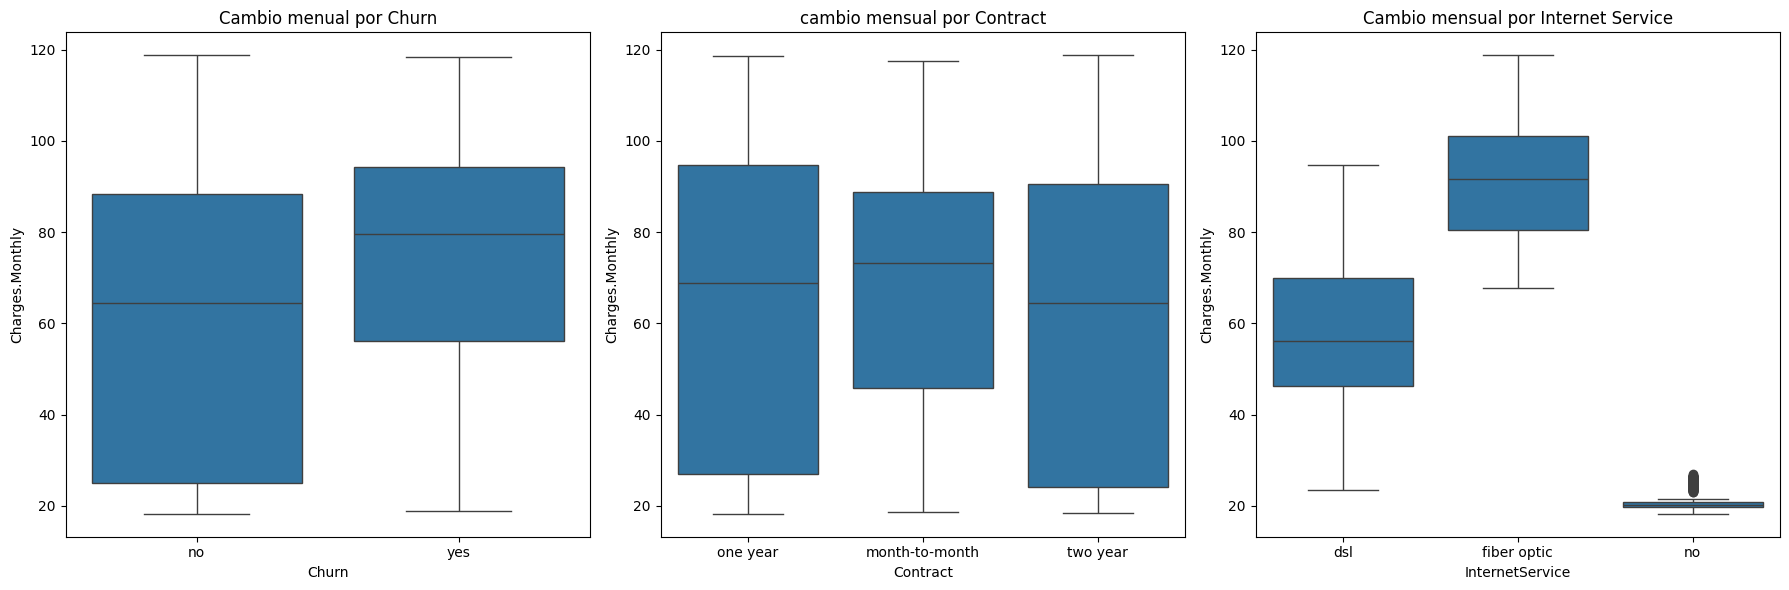

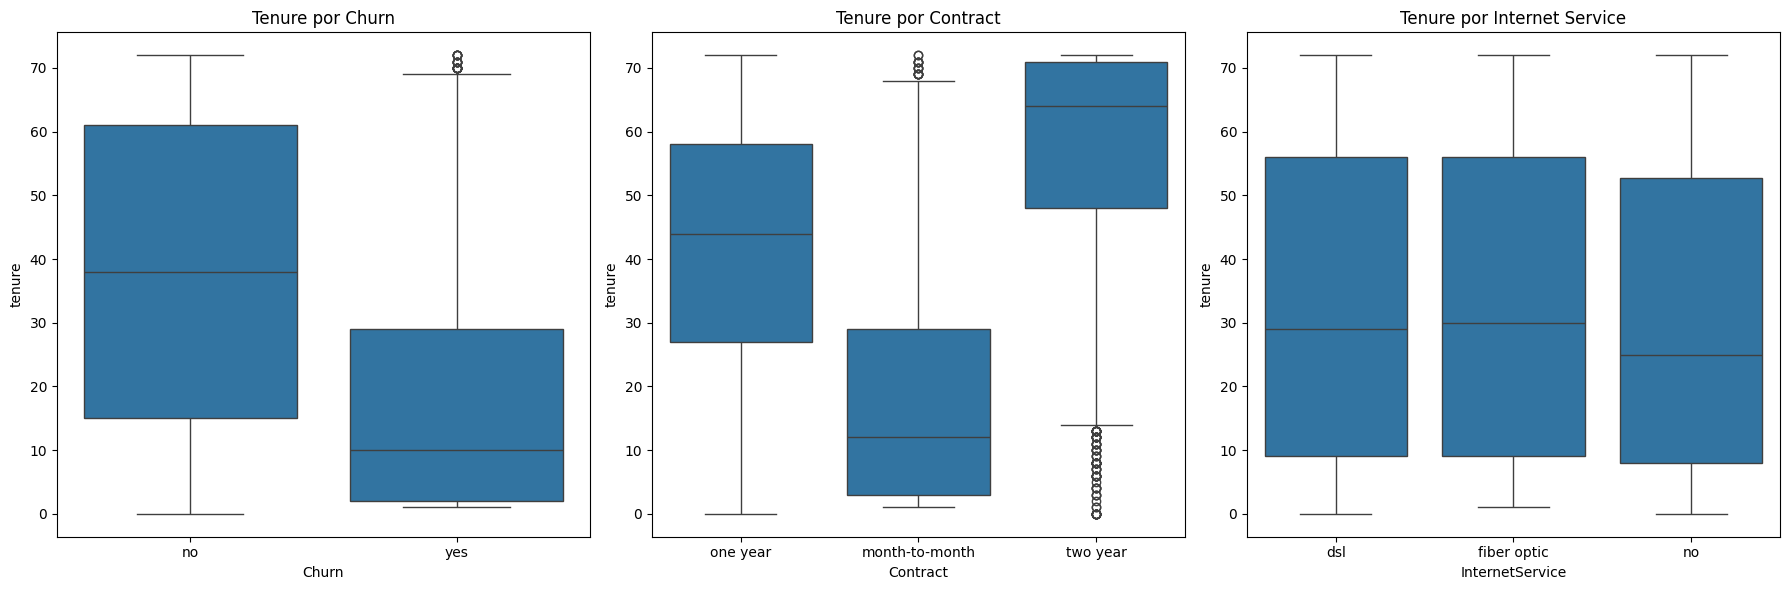

In [ ]:
#Graficos de dispersion

# 2. Box plots por 'Cambio mensual' distribucion de cada categoria por 'Churn', 'Contract', e 'InternetService'.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(data=df, x='Churn', y='Charges.Monthly', ax=axes[0])
axes[0].set_title('Cambio menual por Churn')
sns.boxplot(data=df, x='Contract', y='Charges.Monthly', ax=axes[1])
axes[1].set_title('cambio mensual por Contract')
sns.boxplot(data=df, x='InternetService', y='Charges.Monthly', ax=axes[2])
axes[2].set_title('Cambio mensual por Internet Service')
plt.tight_layout()
plt.show()

# 3. Box plots por 'tenure' distribucion de cada categoria por  'Churn', 'Contract', e 'InternetService'.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(data=df, x='Churn', y='tenure', ax=axes[0])
axes[0].set_title('Tenure por Churn')
sns.boxplot(data=df, x='Contract', y='tenure', ax=axes[1])
axes[1].set_title('Tenure por Contract')
sns.boxplot(data=df, x='InternetService', y='tenure', ax=axes[2])
axes[2].set_title('Tenure por Internet Service')
plt.tight_layout()
plt.show()

#📄Informe final

Despues del analisis estadisco y grafico podemos concluir que:

Las columnas numéricas (SeniorCitizen, tenure, Charges.Monthly y Charges.Total), indican posible valores atipicos en Charges Total.

Las columnas categóricas indican que la mayoria de los clientes que no abandonaron  (churn), eran hombres y no tenían pareja ni dependientes.

Respecto de los contratos y servicios, la modalidad mes a mes y servicio de internet por fibra óptica fueron los más prevalentes.

De las visualizaciones se puede sospechar que los  clientes con menor antigüedad (tenure) y cargos mensuales más altos tienen más probabilidades de darse de baja.

Los clientes con mas abandono son los que tienen cargos mensuales medianos más altos y una antigüedad mediana significativamente menor en comparación con los que no se dieron de baja.

Los contratos mes a mes y el servicio de internet por fibra óptica presentan tasas de abandono más altas en comparación con otros tipos de contrato y servicio de internet.

Conclusiones los próximos pasos:
hay que enfocarse en la retencio de clientes con menor antiguedad y cargos mensuales mas altos, en especial aquellos con contratos "mes a mes" o con internet con fibra optica.
hay que investigar la alta tasa de abandono entre los clientes con fibra optica (posibles problemas de calidad del servicio o precios no competitivos).